<a href="https://colab.research.google.com/github/VAEH/fundamentos_datos/blob/main/Proyecto_Fundamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Problema del negocio.
Se desea realizar inicialmente un análisis exploratorio del Dataset "Student Performance Data Set" obtenido de [Kaggle](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set/data), en el cual se aborda el rendimiento de los alumnos de secudaria de dos colegios portugueses.

##**MOTIVACIÓN DEL ESTUDIO**

La base de datos nos llamó la atención porque podíamos aplicar un análisis de correlación, dado que nos hacían una nota aclaratoria de que tanto las calificaciones del periodo 1 (G1) como del periodo 2 (G2) estan linealmente correlacionadas con el periodo 3 (G3). De esta forma quisimos comprobar si tal hipótesis es cierta.

Este análisis se hizo a través de un mapa de calor o también llamado matriz de correlación mostrando la relación entre todas las combinaciones de las variables de nuestro dataframe.

También nos pareció interesante aplicar una regresión lineal para modelar la relación entre periodo 1 (G1) y periodo 2 (G2) como variables independientes con respecto al periodo 3 (G3) como variable dependiente de estas.



##2. Atributos existentes en el Data Set.
Los atributos de los datos se describen a continuación:

* **school:** colegio en el que está inscrito el alumno (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
* **sex:** Sexo del estudiante (binario: 'F' - femenino o 'M' - masculino)
* **age:** edad del estudiante (numerico: desde los 15 hasta los 22)  
* **address:** tipo de hogar del estudiante (binario: 'U' - urbano o 'R' - rural)
* **famsize:** tañamo del nucleo familiar (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor a 3)
* **Pstatus:** estado de convivencia de los padres (binario: 'T' - viven juntos o 'A' - viven aparte)
* **Medu:** educación de la madre (numerico: 0 - ninguno, 1 - educación primaria (4to grado), 2 (5to a 9no grado), 3 (educación secundaria) o 4 (educación superior)
* **Fedu:** educación del padre (numerico: 0 - ninguno, 1 - educación primaria (4to grado), 2 (5to a 9no grado), 3 (educación secundaria) o 4 (educación superior)
* **Mjob:** Trabajo de la madre (str: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob:** Trabajo de la madre (str: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason:** Razón para elegir la escuela (str: close to 'home', school 'reputation', 'course' preference or 'other')
* *guardian:** tutor del estudiante (str: 'mother', 'father' o 'other')
* **traveltime:** tiempo de viaje de la casa a la escuela (numerico: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
* **studytime:** tiempo de estudio semanal del estudiante (numerico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
* **failures:** numero de clases pasadas no aprobadas (numerico: n si 1<=n<3, de lo contrario 4)
* **schoolsup:** soporte educativo extra al estudiante (binario: yes-no)
* **famsup:** soporte educativo de la familia (binario: yes-no)
* **paid:** clases extra pagadas dentro de la materia del curso (Matematicas o Portugues) (binario: yes-no)
* **activities:** el estudiante realiza actividades extracurriculares (binario: yes-no)
* **nursery:** el estudiante asistió a la guardería (binario: yes-no)
* **higher:** el estudiante desea realizar estudios de educación superior (binario: yes-no)
* **internet:** el estudiante tiene acceso a internet en casa (binario: yes-no)
* **romantic:** el estudiante se encuentra en una relación sentimental (binario: yes-no)
* **famrel:** calidad de las relaciones familiares (numerico: desde 1 - muy mala hasta 5 - excelente)
* **freetime:** tiempo libre del estudiante después de la escuela (numerico: desde 1 - muy poco hasta 5 - muy alto)
* **goout:** tiempo que el estudiante utiliza para salir con amigos (numerico: desde 1 - muy bajo hasta 5 - muy alto)
* **Dalc:** consumo de alcohol en días de estudio (numerico: desde 1 - muy bajo hasta 5 - muy alto)
* **Walc:** consumo de alcohol en fines de semana (numerico: desde 1 - muy bajo hasta 5 - muy alto)
* **health:** estado de salud actual del estudiante (numerico: desde 1 - muy malo hasta 5 - muy bueno)
* **absences:** numero de faltas a clase (numerico: de 0 a 93)
* **G1:** nota del estudiande en el primer periodo (numerico: de 0 a 20)
* **G2:** nota del estudiande en el segundo periodo (numerico: de 0 a 20)
* **G3:** nota final del estudiande (numerico: de 0 a 20)




In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Lectura
df_rend = pd.read_csv('https://raw.githubusercontent.com/n-ramirez1/Espec_AyCD_UdeA/main/01_Fundamentos_Prog/03_Proyecto_Final/student-por.csv')
df_rend.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
510,MS,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,1,1,0,15,17,17
369,GP,F,19,U,GT3,T,1,1,other,other,...,1,5,5,4,3,5,12,10,10,11
53,GP,F,15,U,GT3,T,4,4,services,services,...,3,3,4,2,3,5,0,13,12,12
33,GP,M,15,U,LE3,T,3,3,other,other,...,5,3,2,1,1,2,0,13,12,12
266,GP,F,17,U,LE3,A,4,2,teacher,other,...,4,3,2,1,1,4,4,15,14,14


In [ ]:
# Copia del Dataframe
df_rend_prd = df_rend.copy()

In [ ]:
# Tamaño del Dataset
df_rend.shape

(649, 33)

In [ ]:
#información sobre los datos y tipos de datos
df_rend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        649 non-null    object
 1   sex           649 non-null    object
 2   age           649 non-null    int64 
 3   address       649 non-null    object
 4   famsize       649 non-null    object
 5   Pstatus       649 non-null    object
 6   Medu          649 non-null    object
 7   Fedu          649 non-null    object
 8   Mjob          649 non-null    object
 9   Fjob          649 non-null    object
 10  reason        649 non-null    object
 11  guardian      649 non-null    object
 12  traveltime    649 non-null    int64 
 13  studytime     649 non-null    int64 
 14  failures      649 non-null    int64 
 15  schoolsup     649 non-null    object
 16  famsup        649 non-null    object
 17  paid          649 non-null    object
 18  activities    649 non-null    object
 19  nursery 

In [ ]:
#breve resumen de las estadísticas descriptivas
df_rend.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Text(0.5, 1.0, 'Correlation Heatmap')

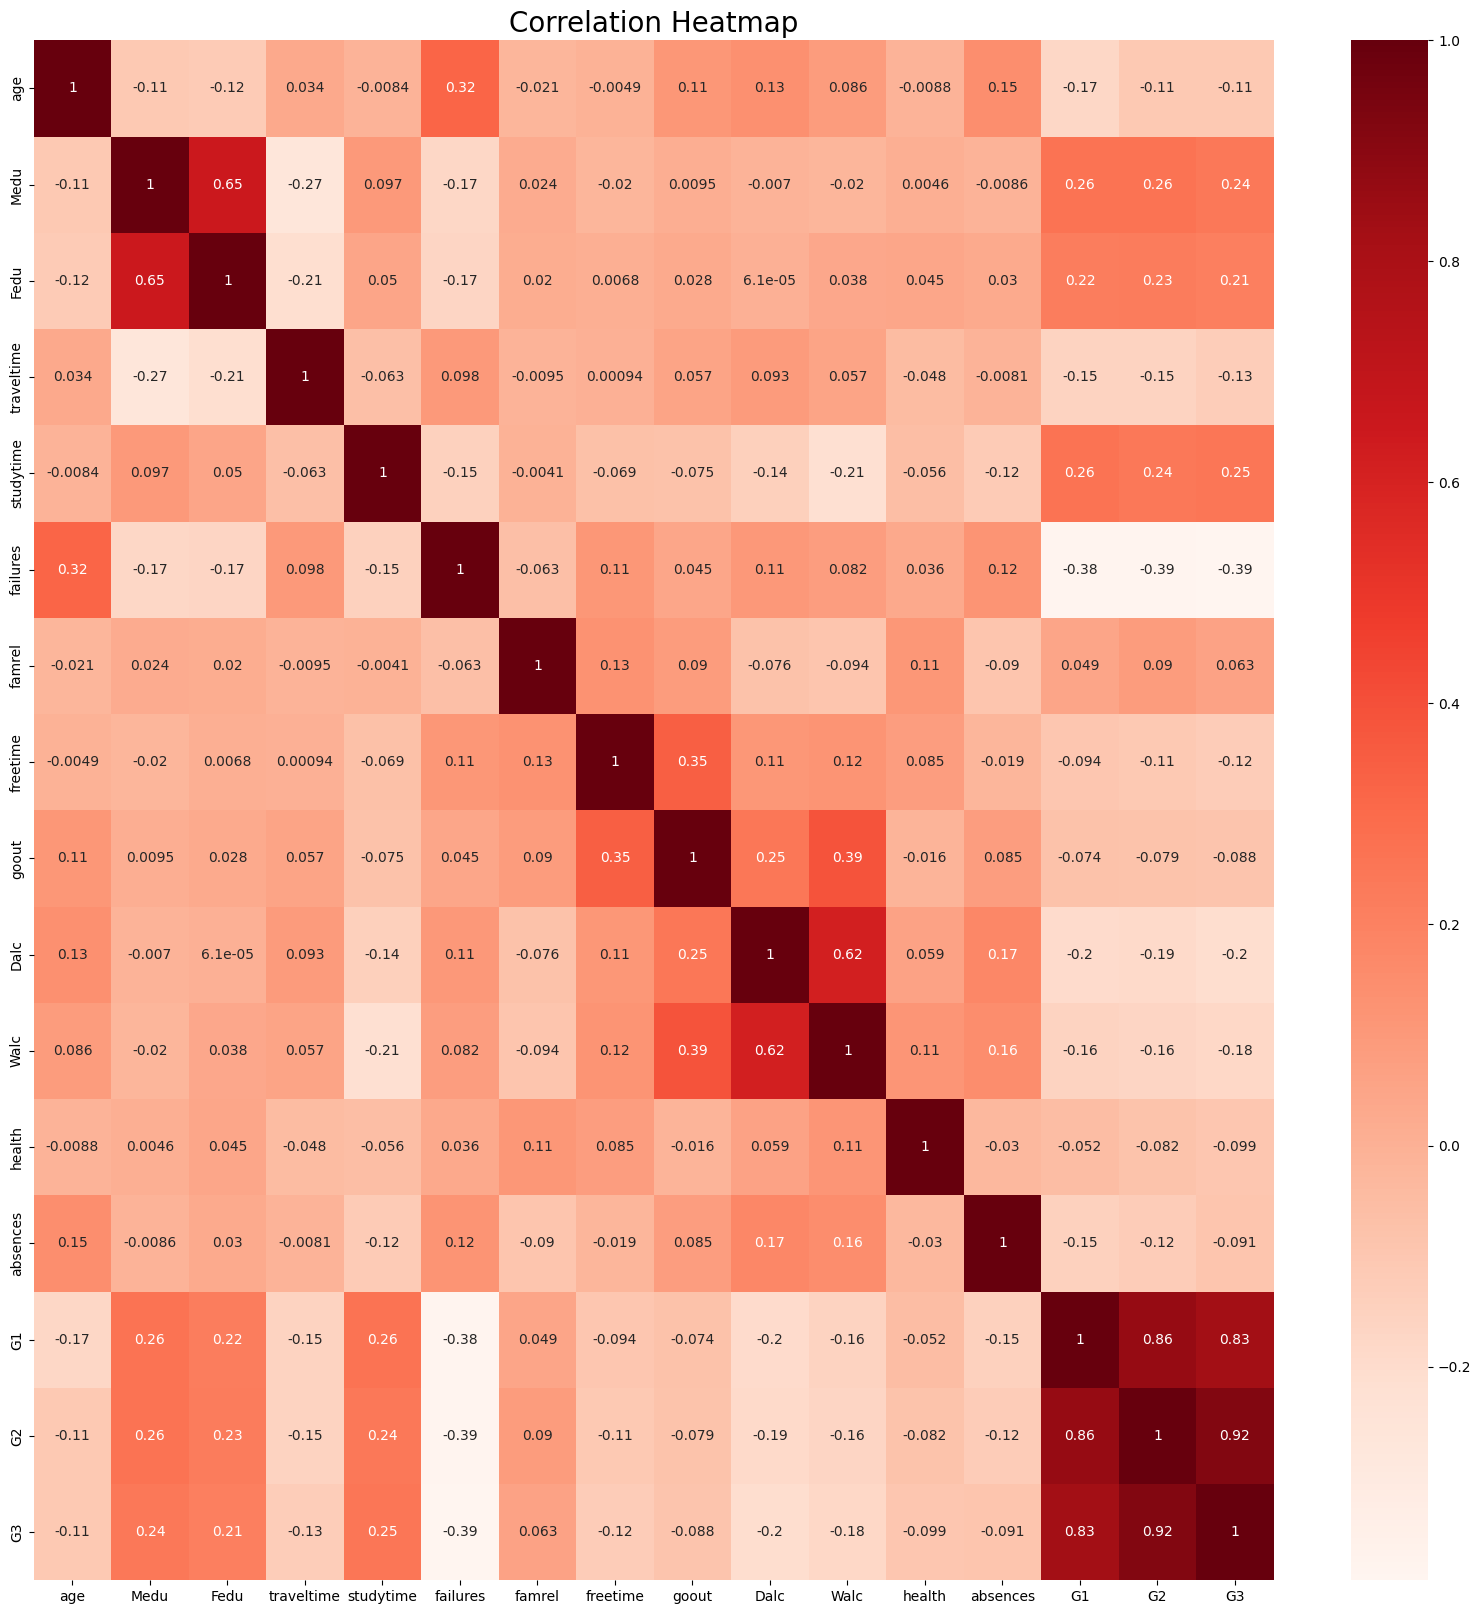

In [ ]:
#se muestra matriz de correlación entre variables
corr=df_rend.corr(numeric_only=True)

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

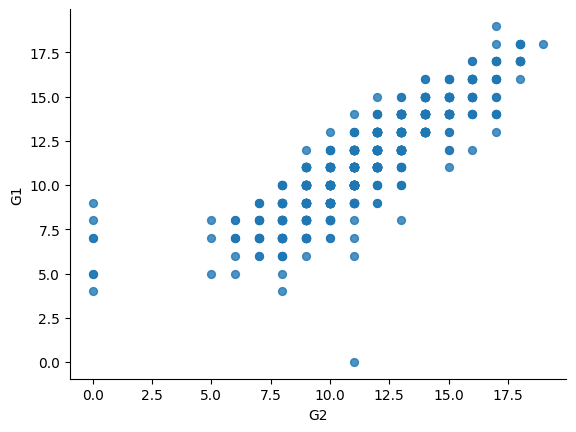

In [ ]:
#diagrama de dispersión para las variables G1 Y G2
from matplotlib import pyplot as plt
df_rend.plot(kind='scatter', x='G2', y='G1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

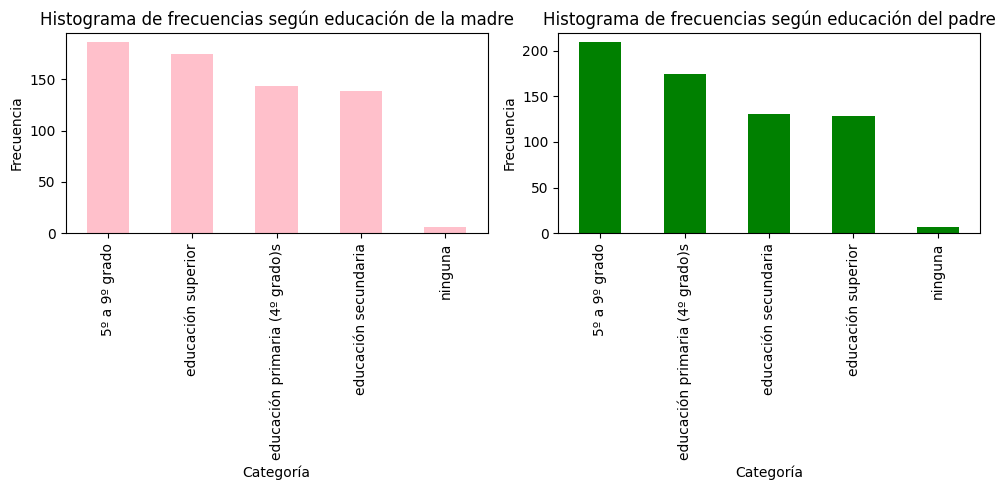

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

nombres_categorias = {0: 'ninguna', 1: 'educación primaria (4º grado)s', 2: '5º a 9º grado', 3: 'educación secundaria', 4:'educación superior'}
df_rend['Medu'] = df_rend['Medu'].replace(nombres_categorias)
columna_categorica = df_rend['Medu']
categorias_ordenadas = sorted(df_rend['Medu'].unique())
conteo_categorias = df_rend['Medu'].value_counts()
conteo_categorias.plot(kind='bar', color='pink', ax=axs[0])

axs[0].set_xlabel('Categoría')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Histograma de frecuencias según educación de la madre')

nombres_categorias = {0: 'ninguna', 1: 'educación primaria (4º grado)s', 2: '5º a 9º grado', 3: 'educación secundaria', 4:'educación superior'}
df_rend['Fedu'] = df_rend['Fedu'].replace(nombres_categorias)
columna_categorica = df_rend['Fedu']
categorias_ordenadas = sorted(df_rend['Fedu'].unique())
conteo_categorias = df_rend['Fedu'].value_counts()
conteo_categorias.plot(kind='bar', color='green', ax=axs[1])

axs[1].set_xlabel('Categoría')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Histograma de frecuencias según educación del padre')

# Mostrar la figura con ambos gráficos uno al lado del otro
plt.tight_layout()
plt.show()

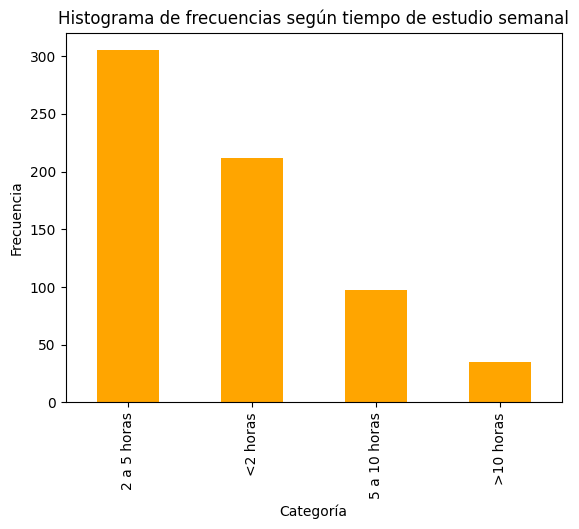

In [ ]:

nombres_categorias = {1: '<2 horas', 2: '2 a 5 horas', 3: '5 a 10 horas', 4: '>10 horas'}

df_rend['studytimeCat'] = df_rend['studytime'].replace(nombres_categorias)
conteo_categorias = df_rend['studytimeCat'].value_counts()
conteo_categorias.plot(kind='bar', color='orange')

plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Histograma de frecuencias según tiempo de estudio semanal')

plt.show()

In [ ]:
# Columnas totales del DataSet
df_rend.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'studytimeCat'],
      dtype='object')

In [ ]:
bins = [0, 10, 12, 14, 16, 20]  # Límites de los intervalos
labels = ['Fail', 'Suficiente', 'Satisfactorio', 'Bueno', 'Excelente']  # Etiquetas correspondientes a los intervalos


In [ ]:
# Utilizar pd.cut() para asignar etiquetas automáticamente
categorias1 = pd.cut(df_rend['G1'], bins=bins, labels=labels, right=False)
categorias2 = pd.cut(df_rend['G2'], bins=bins, labels=labels, right=False)
categorias3 = pd.cut(df_rend['G3'], bins=bins, labels=labels, right=False)

In [ ]:
# Agregamos valores categoricos a nuevas columnas DataFrame
df_rend['G1Cat']= categorias1
df_rend['G2Cat']= categorias2
df_rend['G3Cat']= categorias3

In [ ]:
df_rend.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,studytimeCat,G1Cat,G2Cat,G3Cat
0,GP,F,18,U,GT3,A,educación superior,educación superior,at_home,teacher,...,1,3,4,0,11,11,2 a 5 horas,Fail,Suficiente,Suficiente
1,GP,F,17,U,GT3,T,educación primaria (4º grado)s,educación primaria (4º grado)s,at_home,other,...,1,3,2,9,11,11,2 a 5 horas,Fail,Suficiente,Suficiente
2,GP,F,15,U,LE3,T,educación primaria (4º grado)s,educación primaria (4º grado)s,at_home,other,...,3,3,6,12,13,12,2 a 5 horas,Satisfactorio,Satisfactorio,Satisfactorio
3,GP,F,15,U,GT3,T,educación superior,5º a 9º grado,health,services,...,1,5,0,14,14,14,5 a 10 horas,Bueno,Bueno,Bueno
4,GP,F,16,U,GT3,T,educación secundaria,educación secundaria,other,other,...,2,5,0,11,13,13,2 a 5 horas,Suficiente,Satisfactorio,Satisfactorio


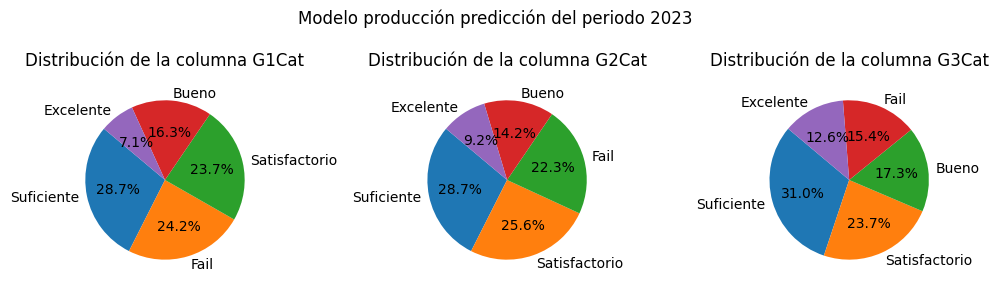

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Primer subgráfico (gráfico de pastel)
conteo = df_rend['G1Cat'].value_counts()
axs[0].pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
axs[0].axis('equal')
axs[0].set_title('Distribución de la columna G1Cat')

# Segundo subgráfico (otro gráfico)
conteo = df_rend['G2Cat'].value_counts()
axs[1].pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
axs[1].axis('equal')
axs[1].set_title('Distribución de la columna G2Cat')

# Tercer subgráfico (otro gráfico)
conteo = df_rend['G3Cat'].value_counts()
axs[2].pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
axs[2].axis('equal')
axs[2].set_title('Distribución de la columna G3Cat')

fig.suptitle("Modelo producción predicción del periodo 2023")

# Mostrar la figura con ambos gráficos uno al lado del otro
plt.tight_layout()
plt.show()

Regresión Lineal

In [ ]:
# Seleccionamos los campos númericos con los cuales se va a entrenar el modelo
df_rend=df_rend[['G1','G2','G3','health','studytime']]
df_rend.head(3)

,G1,G2,G3,health,studytime
0,0,11,11,3,2
1,9,11,11,3,2
2,12,13,12,3,2


In [ ]:
# Seleccionamos lo campos tanto para X y Y, insumo base de la predición
predict='G3'
x=np.array(df_rend.drop(['G3'], axis=1))
y=np.array(df_rend[predict])

In [ ]:
df_rend.head()

,G1,G2,G3,health,studytime
0,0,11,11,3,2
1,9,11,11,3,2
2,12,13,12,3,2
3,14,14,14,5,3
4,11,13,13,5,2


In [ ]:
# Se toma una muestra del 20% y se divide en 4 partes, X y Y para el entrenamiento y Testeo
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.20)

In [ ]:
# Entrenamos nuestro modelo
linear=LinearRegression().fit(x_train, y_train)  #Fit our model on x_train & y_train

# Obtenemos la exactitud del modelo
accuracy=linear.score(x_test,y_test)
print(accuracy)

0.7332877753821523


In [ ]:
# Realizamos el test del modelo de predicion
predictions=linear.predict(x_test)

# Generamos una muestra del resultado final del modelo
# range(len(predictions))
for i in range(5):
    print (round(predictions[i]),x_test[i],y_test[i])

8 [9 8 5 2] 8
12 [11 12  4  3] 12
9 [7 9 2 3] 10
13 [13 12  3  2] 13
11 [12 11  5  2] 12


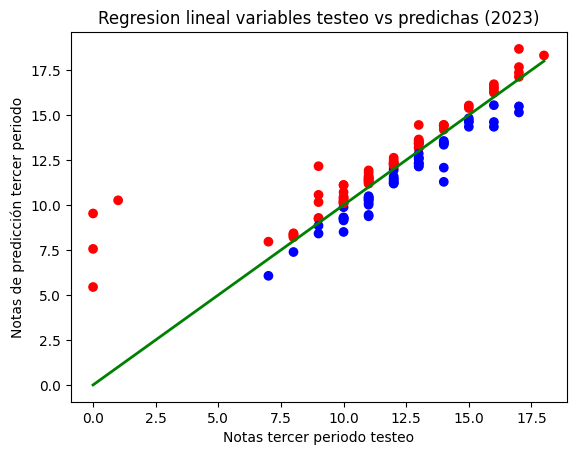

In [ ]:
# Realizamos la grafica de la regresión

colores = ['blue' if y > p else 'red' for y, p in zip(y_test, predictions)]

# Se grafica los colores diferentes para grupo
plt.scatter(y_test, predictions, c=colores)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='g', lw=2)
plt.xlabel('Notas tercer periodo testeo')
plt.ylabel('Notas de predicción tercer periodo')
plt.title('Regresion lineal variables testeo vs predichas (2023)')
plt.show()

## Puesta en Producción del Modelo para el año 2024

In [ ]:
df_rend_prd = df_rend_prd[['G1','G2','G3']]
df_rend_prd.head(3)

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12


In [ ]:
predict='G3'
x=np.array(df_rend_prd.drop(['G3'], axis=1))
y=np.array(df_rend_prd[predict])
df_rend_prd.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.20)
linear=LinearRegression().fit(x_train, y_train)
accuracy=linear.score(x_test,y_test)
print(accuracy)
predictions=linear.predict(x_test)
# predictions.size
# range(len(predictions)):Z
for i in range(5):
    print (round(predictions[i]),x_test[i],y_test[i])

0.8260027482215927
18 [17 18] 18
7 [6 7] 8
15 [14 15] 16
6 [7 6] 8
11 [11 11] 11


### Generación de matrix aleatoria para el año 2024 G1 y G2

In [ ]:
# Número de filas y columnas deseadas
num_filas = 600  # Cambia este valor al número deseado de filas
num_columnas = 0

# Generar las filas divididas por comas (excepto la última)
matriz_aleatoria = []
for _ in range(num_filas - 1):
    fila = np.random.randint(0, 100, size=num_columnas)  # Genera una fila aleatoria con valores entre 0 y 99
    matriz_aleatoria.append(list(fila))  # Agrega la fila a la matriz sin comas

# Generar la última fila sin comas
ultima_fila = np.random.randint(0, 100, size=num_columnas)  # Genera la última fila aleatoria
matriz_aleatoria.append(list(ultima_fila))  # Agrega la última fila a la matriz sin comas

for lista in matriz_aleatoria:
    lista.extend(np.random.randint(0, 21, size=2))

# Convertir la lista de listas en una matriz de NumPy
matriz_resultado = np.array(matriz_aleatoria)

matriz_resultado

array([[ 3, 13],
       [19, 16],
       [16,  3],
       ...,
       [ 7,  8],
       [17,  4],
       [18,  2]])

In [ ]:
df_aleatorio =df_aleatorio = pd.DataFrame(matriz_resultado, columns=['G1','G2'])
g3predict = linear.predict(matriz_resultado)
df_aleatorio['G3P'] = np.round(g3predict, decimals=2).astype(int)
df_aleatorio.head(2)

,G1,G2,G3P
0,3,13,12
1,19,16,16


In [ ]:
bins = [0, 10, 12, 14, 16, 20]  # Límites de los intervalos
labels = ['Fail', 'Suficiente', 'Satisfactorio', 'Bueno', 'Excelente']  # Etiquetas correspondientes a los intervalos

# Utilizar pd.cut() para asignar etiquetas automáticamente
categorias1 = pd.cut(df_aleatorio['G1'], bins=bins, labels=labels, right=False)
categorias2 = pd.cut(df_aleatorio['G2'], bins=bins, labels=labels, right=False)
categorias3 = pd.cut(df_aleatorio['G3P'], bins=bins, labels=labels, right=False)
# Crear un DataFrame con los datos originales y las etiquetas asignadas
df_aleatorio['G1Cat']= categorias1
df_aleatorio['G2Cat']= categorias2
df_aleatorio['G3Pcat']= categorias3
df_aleatorio.head()

,G1,G2,G3P,G1Cat,G2Cat,G3Pcat
0,3,13,12,Fail,Satisfactorio,Satisfactorio
1,19,16,16,Excelente,Excelente,Excelente
2,16,3,4,Excelente,Fail,Fail
3,8,4,4,Fail,Fail,Fail
4,13,8,8,Satisfactorio,Fail,Fail


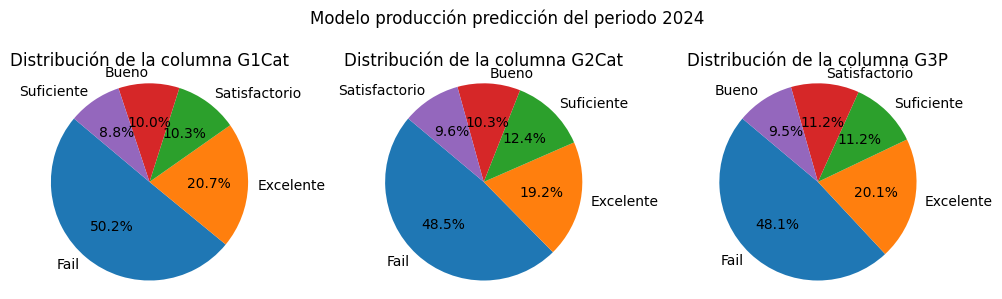

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Primer subgráfico (gráfico de pastel)
conteo = df_aleatorio['G1Cat'].value_counts()
axs[0].pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
axs[0].axis('equal')
axs[0].set_title('Distribución de la columna G1Cat')

# Segundo subgráfico (otro gráfico)
conteo = df_aleatorio['G2Cat'].value_counts()
axs[1].pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
axs[1].axis('equal')
axs[1].set_title('Distribución de la columna G2Cat')

# Tercer subgráfico (otro gráfico)
conteo = df_aleatorio['G3Pcat'].value_counts()
axs[2].pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=140)
axs[2].axis('equal')
axs[2].set_title('Distribución de la columna G3P')

fig.suptitle("Modelo producción predicción del periodo 2024")
# Mostrar la figura con ambos gráficos uno al lado del otro
plt.tight_layout()
plt.show()